

---


# **TITANIC : MACHINE LEARNING FROM DISASTER**


---


**ANLC 763: Final Project**

**Submitted by : Namrata Adhikari**


---





---


# **STEP 1: Load the data and libraries**


---



In [28]:
from google.colab import drive
drive.mount ('/content/drive', force_remount =True)

# Load the necessary libraries

# For Data Wrangling
import pandas as pd
import numpy as np

# For Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


# For Data Modeling
import statsmodels.formula.api as StatModel

Mounted at /content/drive


In [29]:
# Load the two data-sets.
train = pd.read_csv(('/content/drive/MyDrive/Colab Notebooks//train.csv'))
test = pd.read_csv(('/content/drive/MyDrive/Colab Notebooks//test.csv'))



---

# **STEP 2: Exploratory Data Analysis**


---





***Let's start by taking the look at the datasets***

---




In [30]:
# Display the first few rows of the training dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# Display the first few rows of the test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
# Display the shape of both the training and test datasets ( Rows/columns)
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)


Training set shape:  (891, 12)
Test set shape:  (418, 11)




---


***Let's explore the data types, summary statistics, and missing values***

---



In [33]:
# Train dataset information
print("Training Dataset Information")
print('-'*40)
train.info()

# Separator line
print('-'*40)

# Test dataset information
print("Test Dataset Information")
print('-'*40)
test.info()

Training Dataset Information
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
Test Dataset Information
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to

In [34]:
# Descriptive statistics of the training dataset
title = 'Summary Statistics: Titanic Training Set'
print(title.center(80, ' '))
print('-'*80)
train.describe()

                    Summary Statistics: Titanic Training Set                    
--------------------------------------------------------------------------------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# Descriptive statistics of the test dataset
title = 'Summary Statistics: Titanic Test Set'
print(title.center(80, ' '))
print('-'*80)
test.describe()

                      Summary Statistics: Titanic Test Set                      
--------------------------------------------------------------------------------


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [36]:
# Calculate missing data for test set
test_missing = test.isnull().sum().sort_values(ascending=False)
test_missing_df = pd.DataFrame(test_missing, columns=['Test Set'])

# Calculate missing data for training set
train_missing = train.isnull().sum().sort_values(ascending=False)
train_missing_df = pd.DataFrame(train_missing, columns=['Training Set'])

# Combine both DataFrames side by side
combined_missing = pd.concat([train_missing_df, test_missing_df], axis=1)

# Display the combined DataFrame
title = 'Missing Data Summary'
print(title.center(40, ' '))
print('-'*40)
print(combined_missing)

          Missing Data Summary          
----------------------------------------
             Training Set  Test Set
Cabin                 687     327.0
Age                   177      86.0
Embarked                2       0.0
PassengerId             0       0.0
Survived                0       NaN
Pclass                  0       0.0
Name                    0       0.0
Sex                     0       0.0
SibSp                   0       0.0
Parch                   0       0.0
Ticket                  0       0.0
Fare                    0       1.0




---


***Feature/Variable Analysis***

Let's analyze the variables individually to see how they correlate with the survival probability. I will start with categorical variables and move towards numerical variables.

**Categorical Variables:** Pclass, Sex, and Embarked

**Numerical Variables:** Age, SibSp, Parch, Fare


---



In [37]:
# CATEGORICAL VARIABLES !!!


# Calculate counts and percentages for Sex
sex_counts = train['Sex'].value_counts()
sex_percentages = train['Sex'].value_counts(normalize=True) * 100

# Combine counts and percentages into a DataFrame
sex_summary = pd.DataFrame({'Count': sex_counts, 'Percentage': sex_percentages})



# Calculate counts and percentages for Pclass
pclass_counts = train['Pclass'].value_counts()
pclass_percentages = train['Pclass'].value_counts(normalize=True) * 100

# Combine counts and percentages into a DataFrame
pclass_summary = pd.DataFrame({'Count': pclass_counts, 'Percentage': pclass_percentages})



# Calculate counts and percentages for Embarked
embarked_counts = train['Embarked'].value_counts()
embarked_percentages = train['Embarked'].value_counts(normalize=True) * 100

# Combine counts and percentages into a DataFrame
embarked_summary = pd.DataFrame({'Count': embarked_counts, 'Percentage': embarked_percentages})



# Function to print summary tables with titles
def print_summary(title, summary):
    print(title.center(30, ' '))
    print('-'*30)
    print(summary)
    print('\n')

# Display the tables
print_summary("Sex Distribution", sex_summary)
print_summary("Pclass Distribution", pclass_summary)
print_summary("Embarked Distribution", embarked_summary)


       Sex Distribution       
------------------------------
        Count  Percentage
Sex                      
male      577   64.758698
female    314   35.241302


     Pclass Distribution      
------------------------------
        Count  Percentage
Pclass                   
3         491   55.106622
1         216   24.242424
2         184   20.650954


    Embarked Distribution     
------------------------------
          Count  Percentage
Embarked                   
S           644   72.440945
C           168   18.897638
Q            77    8.661417




In [38]:
# Calculate the mean survival rate for each group
sex_survival = train.groupby('Sex')['Survived'].mean().reset_index()
pclass_survival = train.groupby('Pclass')['Survived'].mean().reset_index()
embarked_survival = train.groupby('Embarked')['Survived'].mean().reset_index()


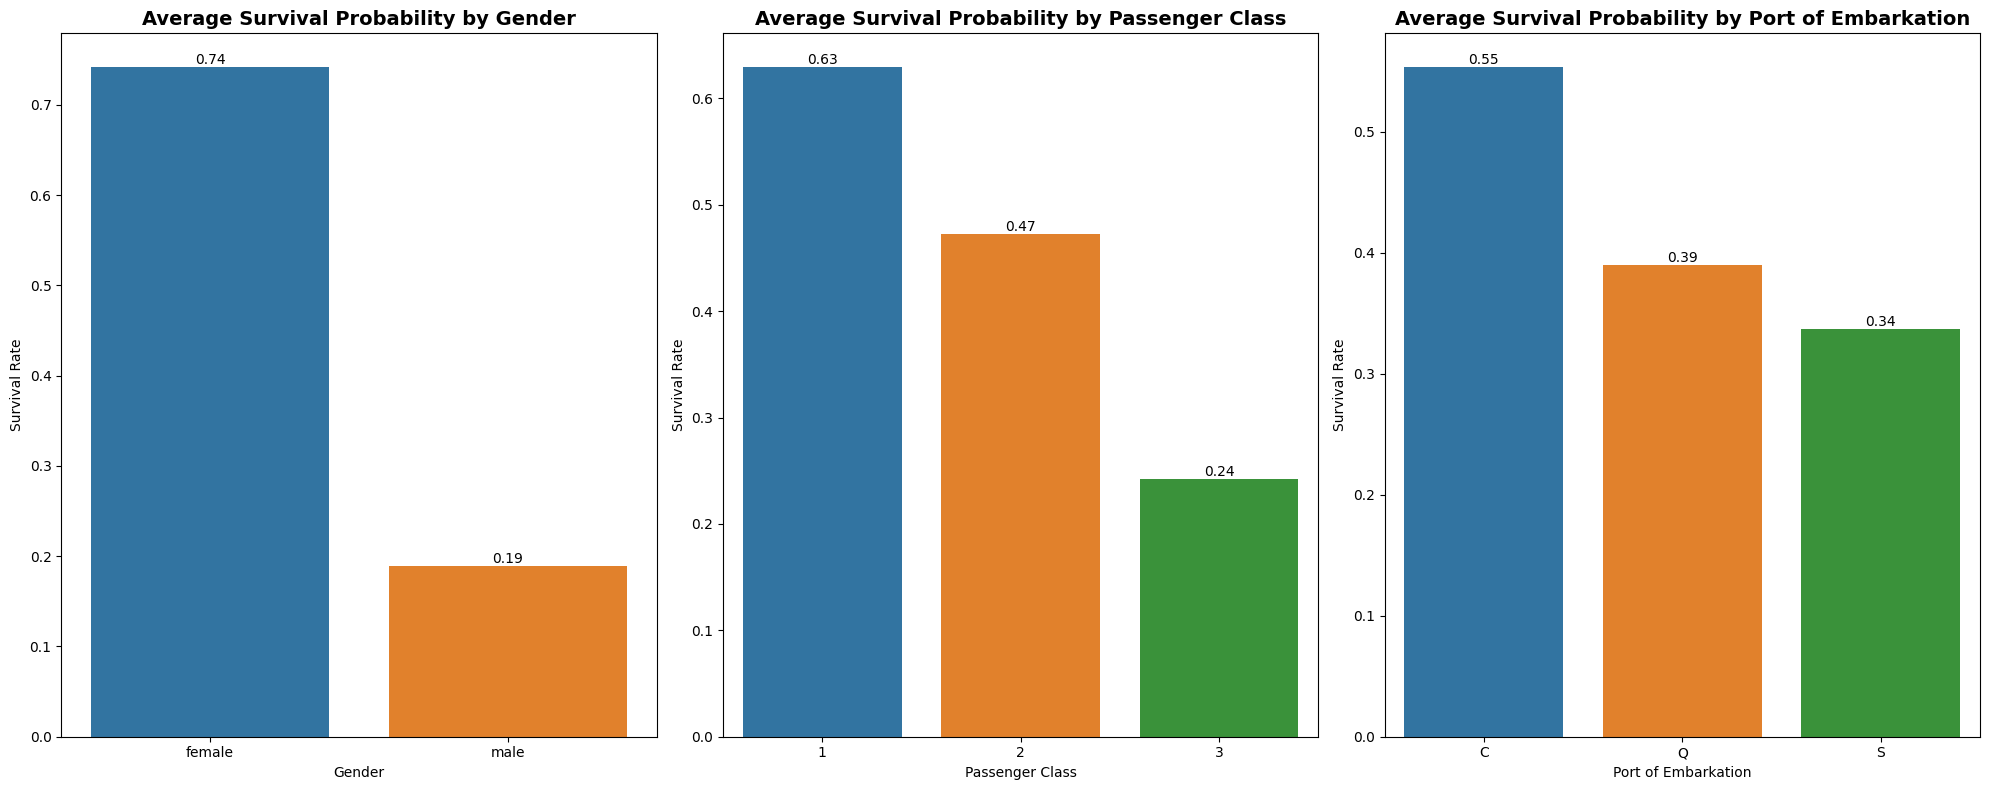

In [39]:
# Let's create three barplots to visulaize the average survival using subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 8))


# Plot average survival by Sex with a specific color palette
sns.barplot(x='Sex', y='Survived', hue='Sex', data=sex_survival, ax=axes[0], palette='tab10')
axes[0].set_title('Average Survival Probability by Gender', fontweight = 'bold', fontsize = 14)
axes[0].set_ylabel('Survival Rate')
axes[0].set_xlabel('Gender')
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')


# Plot average survival by Pclass
sns.barplot(x='Pclass', y='Survived', hue = 'Pclass', data=pclass_survival, ax=axes[1], palette='tab10')
axes[1].set_title('Average Survival Probability by Passenger Class', fontweight = 'bold', fontsize = 14)
axes[1].set_ylabel('Survival Rate')
axes[1].set_xlabel('Passenger Class')
axes[1].legend_.remove()
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        axes[1].annotate(format(height, '.2f'),
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points')


# Plot average survival by Embarked
sns.barplot(x='Embarked', y='Survived', hue = 'Embarked', data=embarked_survival, ax=axes[2], palette='tab10')
axes[2].set_title('Average Survival Probability by Port of Embarkation', fontweight = 'bold', fontsize = 14)
axes[2].set_ylabel('Survival Rate')
axes[2].set_xlabel('Port of Embarkation')
for p in axes[2].patches:
    axes[2].annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')

# Adjust layout
plt.tight_layout()
plt.show()

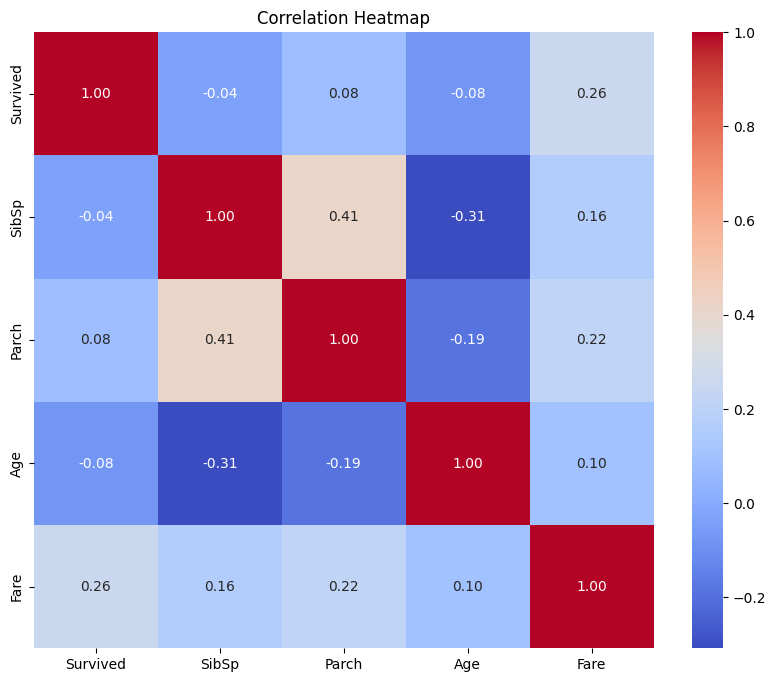

In [40]:
# NUMERICAL VARIABLES ####

# Numerical Variables coorelation with Survival
plt.figure(figsize=(10, 8))
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

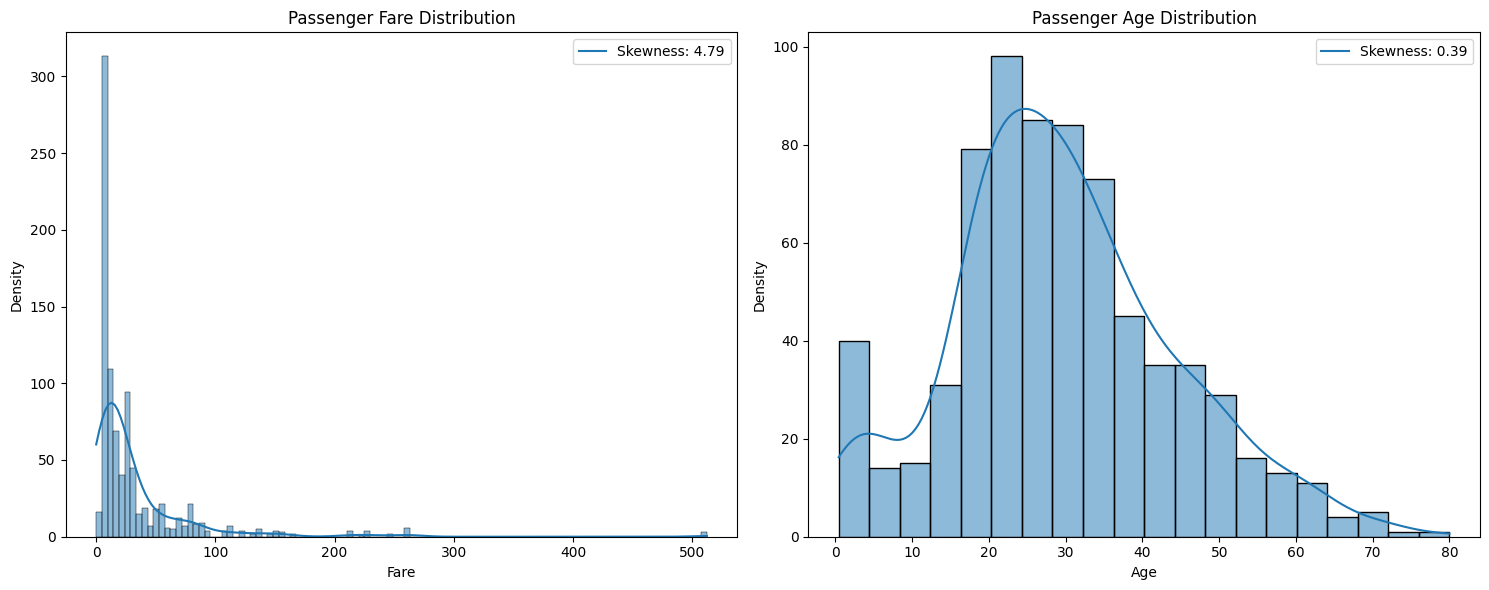

In [41]:
# AGE and FARE Distribution !


# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Passenger age distribution
sns.histplot(train['Age'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Passenger Age Distribution')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')
axes[1].legend([f'Skewness: {train["Age"].skew():.2f}'], loc='best')

# Passenger fare distribution
sns.histplot(train['Fare'], kde=True, ax=axes[0])
axes[0].set_title('Passenger Fare Distribution')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Density')
axes[0].legend([f'Skewness: {train["Fare"].skew():.2f}'], loc='best')

# Adjust layout
plt.tight_layout()
plt.show()



---



# **STEP 3: Data Cleaning/Pre-Processing**


---



***Handle Missing Values***


---



In [42]:
# Calculate missing data for test set
test_missing = test.isnull().sum().sort_values(ascending=False)
test_missing_df = pd.DataFrame(test_missing, columns=['Test Set'])

# Calculate missing data for training set
train_missing = train.isnull().sum().sort_values(ascending=False)
train_missing_df = pd.DataFrame(train_missing, columns=['Training Set'])

# Combine both DataFrames side by side
combined_missing = pd.concat([train_missing_df, test_missing_df], axis=1)

# Display the combined DataFrame
title = 'Missing Data Summary'
print(title.center(40, ' '))
print('-'*40)
print(combined_missing)

          Missing Data Summary          
----------------------------------------
             Training Set  Test Set
Cabin                 687     327.0
Age                   177      86.0
Embarked                2       0.0
PassengerId             0       0.0
Survived                0       NaN
Pclass                  0       0.0
Name                    0       0.0
Sex                     0       0.0
SibSp                   0       0.0
Parch                   0       0.0
Ticket                  0       0.0
Fare                    0       1.0


In [43]:
# Impute missing values in the Embarked column with the mode in the train set.

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [44]:
# Impute missing values in the Fare column with the median in the test set.

test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [45]:
# Impute the Age column in both dataset.

data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # Compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

In [46]:
# Calculate missing data for test set
test_missing = test.isnull().sum().sort_values(ascending=False)
test_missing_df = pd.DataFrame(test_missing, columns=['Test Set'])

# Calculate missing data for training set
train_missing = train.isnull().sum().sort_values(ascending=False)
train_missing_df = pd.DataFrame(train_missing, columns=['Training Set'])

# Combine both DataFrames side by side
combined_missing = pd.concat([train_missing_df, test_missing_df], axis=1)

# Display the combined DataFrame
title = 'Missing Data Summary'
print(title.center(40, ' '))
print('-'*40)
print(combined_missing)

          Missing Data Summary          
----------------------------------------
             Training Set  Test Set
Cabin                 687     327.0
PassengerId             0       0.0
Survived                0       NaN
Pclass                  0       0.0
Name                    0       0.0
Sex                     0       0.0
Age                     0       0.0
SibSp                   0       0.0
Parch                   0       0.0
Ticket                  0       0.0
Fare                    0       0.0
Embarked                0       0.0


***Feature Engineering : Creating new features and dropping irrelevant features***


---



In [47]:
# Drop PassengerID, Ticket, Name, and Cabin variable from the datasets
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [48]:
# Combine the SibSp and Parch Variable and create new variable: Family and Single
data = [train, test]
for dataset in data:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Family'] > 0, 'Single'] = 0
    dataset.loc[dataset['Family'] == 0, 'Single'] = 1
    dataset['Single'] = dataset['Single'].astype(int)
train['Single'].value_counts()

Single
1    537
0    354
Name: count, dtype: int64

In [49]:
# Drop the SibSp and Parch variable
train = train.drop(['SibSp', 'Parch'], axis=1)
test = test.drop(['SibSp', 'Parch'], axis=1)

<ipython-input-50-fc9379f55ad3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Single', y='Survived', data=train, ax=axes[0], palette='tab10')
<ipython-input-50-fc9379f55ad3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family', y='Survived', data=train, ax=axes[1], palette='tab10')


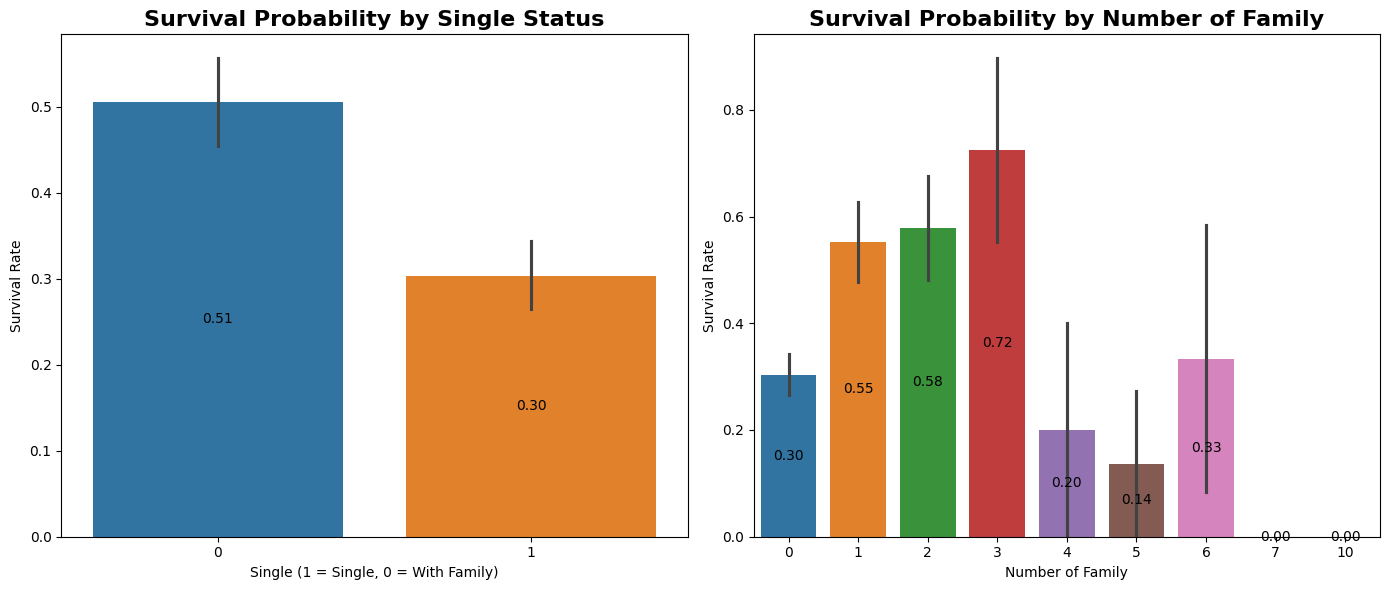

In [50]:
# Create a figure with two subplots for new features : single and family
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Mean survival by alone status
sns.barplot(x='Single', y='Survived', data=train, ax=axes[0], palette='tab10')
axes[0].set_title('Survival Probability by Single Status', fontweight='bold', fontsize=16)
axes[0].set_xlabel('Single (1 = Single, 0 = With Family)')
axes[0].set_ylabel('Survival Rate')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(format(height, '.2f'),
                     (p.get_x() + p.get_width() / 2., height / 2),
                     ha='center', va='center',
                     xytext=(0, 0),
                     textcoords='offset points')

# Plot 2: Mean survival by number of relatives
sns.barplot(x='Family', y='Survived', data=train, ax=axes[1], palette='tab10')
axes[1].set_title('Survival Probability by Number of Family', fontweight='bold', fontsize=16)
axes[1].set_xlabel('Number of Family')
axes[1].set_ylabel('Survival Rate')
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(format(height, '.2f'),
                     (p.get_x() + p.get_width() / 2., height / 2),
                     ha='center', va='center',
                     xytext=(0, 0),
                     textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

In [51]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Single
0,0,3,male,22,7.2500,S,1,0
1,1,1,female,38,71.2833,C,1,0
2,1,3,female,26,7.9250,S,0,1
3,1,1,female,35,53.1000,S,1,0
4,0,3,male,35,8.0500,S,0,1


In [52]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,Single
0,892,3,male,22,7.8292,Q,0,1
1,893,3,female,38,7.0000,S,1,0
2,894,2,male,26,9.6875,Q,0,1
3,895,3,male,35,8.6625,S,0,1
4,896,3,female,35,12.2875,S,2,0


***FEATURE ENCODING***


---



In [53]:
# Convert Sex into numerical values for both datasets
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


In [54]:
# Convert Embarked into numerical values for both datasets
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [55]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Single
0,0,3,0,22,7.2500,0,1,0
1,1,1,1,38,71.2833,1,1,0
2,1,3,1,26,7.9250,0,0,1
3,1,1,1,35,53.1000,0,1,0
4,0,3,0,35,8.0500,0,0,1


In [56]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,Single
0,892,3,0,22,7.8292,2,0,1
1,893,3,1,38,7.0000,0,1,0
2,894,2,0,26,9.6875,2,0,1
3,895,3,0,35,8.6625,0,0,1
4,896,3,1,35,12.2875,0,2,0


In [57]:
# Train dataset information
print("Training Dataset Information")
print('-'*40)
train.info()

# Separator line
print('-'*40)

# Test dataset information
print("Test Dataset Information")
print('-'*40)
test.info()

Training Dataset Information
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   Family    891 non-null    int64  
 7   Single    891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB
----------------------------------------
Test Dataset Information
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   S

# **STEP 4: Data Modeling**


---



***Logistic Regression Model will be used***


---



In [58]:
LRModel = StatModel.logit(formula = 'Survived ~ Pclass + Sex + Age + Fare + Embarked + Family + Single ', data = train).fit()
LRModel.summary()

Optimization terminated successfully.
         Current function value: 0.438334
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                  0.3418
Time:                        03:06:39   Log-Likelihood:                -390.56
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.544e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5458      0.509      4.999      0.000       1.548       3.544
Pclass        -1.0461      0.142     -7.382      0.000      -1.324      -0.768
Sex            2.6623      0.199     13.354      0.000       2.272       3.053
Age           -0.0360      0.008     -4.793      0.000      -0.051      -0.021
Fare           0.0020      0.002      0.868      0.385      -0.003       0.007
Embarked       0.2211      0.142      1.558      0.119      -0.057       0.499
Family        -0.3926      0.100     -3.934      0.000      -0.588      -0.197
Single        -0.7469      0.272     -2.744      0.006      -1.280      -0.213
==============================================================================
"""

In [59]:
# Predict
# Provides the percent of probability of a "Survived" outcome
SurvivalPredict = LRModel.predict(test)
SurvivalPredict

0      0.158082
1      0.580475
2      0.317222
3      0.070396
4      0.512644
         ...   
413    0.091608
414    0.906598
415    0.082895
416    0.072703
417    0.146910
Length: 418, dtype: float64

In [60]:
# Converting to percentage rounded to 1 decimal place
test['Prob_Survived'] = round(SurvivalPredict*100, 1).tolist()
test['Survived'] = np.where(test.Prob_Survived > 50, 1, 0)
print(test[['PassengerId', 'Prob_Survived', 'Survived']])

     PassengerId  Prob_Survived  Survived
0            892           15.8         0
1            893           58.0         1
2            894           31.7         0
3            895            7.0         0
4            896           51.3         1
..           ...            ...       ...
413         1305            9.2         0
414         1306           90.7         1
415         1307            8.3         0
416         1308            7.3         0
417         1309           14.7         0

[418 rows x 3 columns]


In [61]:
# Summarizing our predictions
test['Survived'].value_counts()

Survived
0    246
1    172
Name: count, dtype: int64

In [63]:
# Creating a prediction dataframe for submissin in Kaggle
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test['Survived']})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
# Save the submission dataset
submission.to_csv('/content/drive/MyDrive/Colab Notebooks//LRsubmission.csv', index=False)



---


# **STEP 5: Refine the Model**


---



***Running the model again after removing insignificant variables***


---



In [66]:
Refined_LRModel = StatModel.logit(formula = 'Survived ~ Pclass + Sex + Age +  Family + Single ', data = train).fit()
Refined_LRModel.summary()

Optimization terminated successfully.
         Current function value: 0.440423
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                  0.3386
Time:                        03:13:54   Log-Likelihood:                -392.42
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.202e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8179      0.454      6.206      0.000       1.928       3.708
Pclass        -1.0920      0.121     -9.030      0.000      -1.329      -0.855
Sex            2.7050      0.198     13.636      0.000       2.316       3.094
Age           -0.0362      0.007     -4.835      0.000      -0.051      -0.022
Family        -0.4009      0.098     -4.082      0.000      -0.593      -0.208
Single        -0.7900      0.271     -2.917      0.004      -1.321      -0.259
==============================================================================
"""

In [68]:
# Predict
# Provides the percent of probability of a "Survived" outcome
SurvivalPredict = Refined_LRModel.predict(test)
SurvivalPredict

0      0.114562
1      0.615307
2      0.250152
3      0.074758
4      0.544254
         ...   
413    0.097435
414    0.885676
415    0.088289
416    0.077302
417    0.128777
Length: 418, dtype: float64

In [69]:
# Converting to percentage rounded to 1 decimal place
test['Prob_Survived'] = round(SurvivalPredict*100, 1).tolist()
test['Survived'] = np.where(test.Prob_Survived > 50, 1, 0)
print(test[['PassengerId', 'Prob_Survived', 'Survived']])

     PassengerId  Prob_Survived  Survived
0            892           11.5         0
1            893           61.5         1
2            894           25.0         0
3            895            7.5         0
4            896           54.4         1
..           ...            ...       ...
413         1305            9.7         0
414         1306           88.6         1
415         1307            8.8         0
416         1308            7.7         0
417         1309           12.9         0

[418 rows x 3 columns]


In [71]:
# Summarizing our predictions
test['Survived'].value_counts()

Survived
0    254
1    164
Name: count, dtype: int64

In [73]:
# Creating a prediction dataframe for submission in Kaggle
submission2 = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test['Survived']}) # Use the 'Survived' column from the 'test' DataFrame
submission2

# Save the submissing dataset
submission2.to_csv('/content/drive/MyDrive/Colab Notebooks//Refined_submission.csv', index=False)